In [1]:
import pandas as pd
from sudulunu.helpers import pp, make_num, dumper
import os 

In [2]:
def combine_from_folder(pathos):
  
  listo = []
  
  fillos = os.listdir(pathos)
  fillos = [pathos + '/' + x for x in fillos if '.csv' in x]
  # print(fillos)

  city_dicto = {}
  for city in fillos:
    city_dicto[city] = city.replace("data/", '').replace('.csv', '')
  
  # print(city_dicto)

  for fillo in fillos:
    inter = pd.read_csv(fillo)

    temp_col = [x for x in inter.columns.tolist() if 'time' in x.lower()]
    inter.rename(columns={temp_col[0]: "Time"}, inplace=True)
    inter['City'] = city_dicto[fillo]

    listo.append(inter)

  cat = pd.concat(listo)

  return cat

data = combine_from_folder('data')


In [3]:
df = data.copy()
# 'Time', 'Temp (°C)', 'Feels Like (°C)', 'Humidity(%)', 
# 'Wind Direction', 'Wind Speed (km/h) (knots)', 'Wind Gust (km/h) (knots)', 
# 'Pressure (hPa)', 'Rainfall since 9 am (mm)', 'Date', 'City'

df = df[['Time', 'Temp (°C)', 'Date','City']]
# df = df[['Time', 'Feels Like (°C)', 'Date','City']]

# pp(df)

### Only keep the whole hour data
df['Time'] = pd.to_datetime(df['Time'], format='%I:%M %p')
# df = df[df['Time'].dt.minute.eq(0) & df['Time'].dt.second.eq(0) & df['Time'].dt.hour.gt(9)]
df = df[df['Time'].dt.minute.eq(0) & df['Time'].dt.second.eq(0)]


In [4]:
listo = []
# for city in df['City'].unique().tolist():
#     inter = df.loc[df['City'] == city].copy()
#     inter = make_num(inter, 'Temp (°C)')
#     grp = inter.groupby(by=['Time'])['Temp (°C)'].mean().reset_index()
#     grp['']
#     listo.append(grp)

# cat = pd.concat(listo)

# df = make_num(df, 'Feels Like (°C)')
# grp = df.groupby(by=['City', 'Time'])['Feels Like (°C)'].mean().reset_index()

df = make_num(df, 'Temp (°C)')
grp = df.groupby(by=['City', 'Time'])['Temp (°C)'].mean().reset_index()
grp.sort_values(by=['City', 'Time'], ascending=True, inplace=True)



grp['Time'] = grp['Time'].dt.strftime("%H:%M")

# pp(grp)

In [5]:
piv = pd.pivot(grp, index='City', columns='Time').reset_index()

pp(piv)

           City Temp (°C)                                                    \
Time                00:00  01:00  02:00  03:00  04:00      05:00      06:00   
0      Adelaide     20.59  20.31  19.67  19.39  19.08  18.980000  18.540000   
1      Brisbane     22.38  22.13  21.85  21.78  21.45  21.230000  21.030000   
2      Canberra     15.80  14.98  14.82  14.73  13.82  13.740000  13.830000   
3        Hobart     15.67  15.52  15.27  15.25  14.78  14.720000  14.700000   
4     Melbourne     18.88  18.65  18.61  18.13  17.97  17.880000  17.600000   
5         Perth     23.05  22.31  21.55  21.17  20.27  20.011111  19.422222   
6        Sydney     21.37  21.36  20.85  20.41  20.04  19.800000  19.650000   

                            ...                                                \
Time      07:00      08:00  ...      14:00  15:00  16:00  17:00  18:00  19:00   
0     18.511111  19.622222  ...  27.470000  28.22  28.24  27.37  26.48  25.25   
1     22.388889  23.933333  ...  28.410000  2

<AxesSubplot: xlabel='None-Time', ylabel='City'>

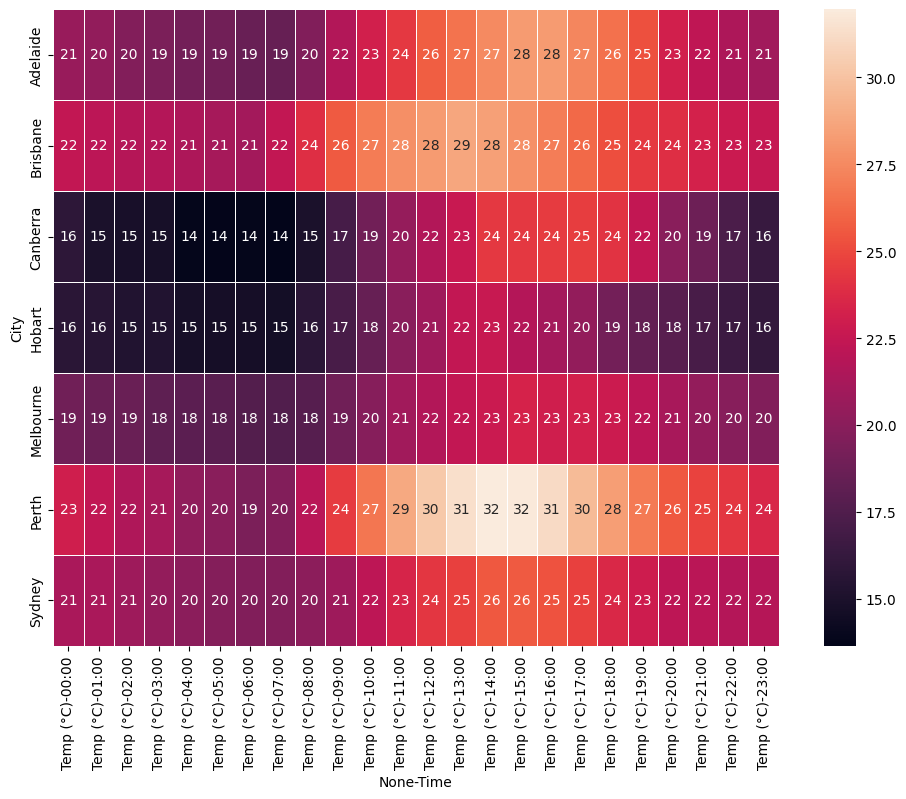

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

piv.set_index("City", inplace=True)

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(piv, annot=True, linewidth=0.5)

        City      Range
6      Perth  12.537778
3   Canberra      10.92
1   Adelaide   9.728889
4     Hobart   8.001111
2   Brisbane       7.66
7     Sydney       5.98
5  Melbourne       5.79
['City', 'Range']


/var/folders/1h/4w391kn52y51w5mmd37_xfn80000gq/T/ipykernel_7290/2690026419.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  biv = biv.append((biv.max(numeric_only=True) - biv.min(numeric_only=True)).rename("Range"))


<AxesSubplot: xlabel='City', ylabel='Range'>

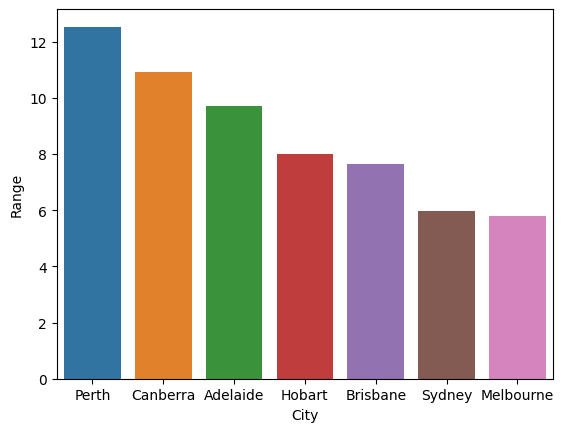

In [7]:
biv = pd.pivot(grp, index='Time', columns='City').reset_index()

biv = biv.append((biv.max(numeric_only=True) - biv.min(numeric_only=True)).rename("Range"))
biv = biv.loc[biv.index == 'Range']

biv = biv.T.reset_index()
biv = biv[1:]
biv = biv[['City', 'Range']]
biv.sort_values(by=['Range'], inplace=True, ascending=False)

pp(biv)

sns.barplot(data=biv, x="City", y="Range")